Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Matriz de confusión:
 [[50839     0]
 [    0 29161]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     50839
        True       1.00      1.00      1.00     29161

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



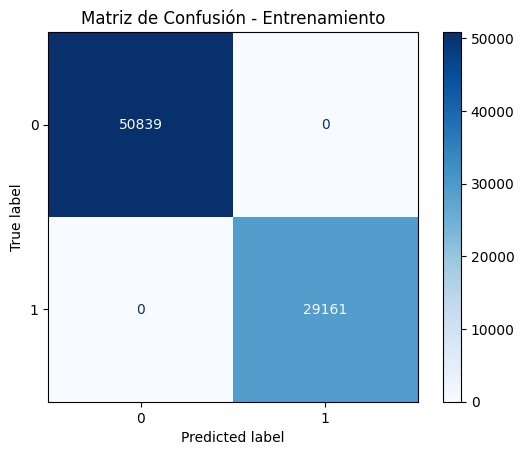

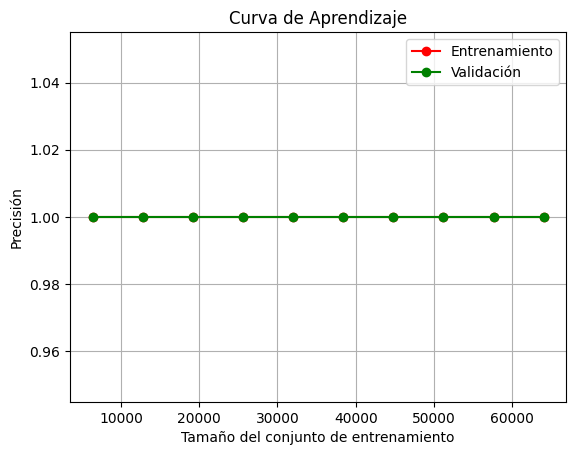

['random_forest_model.pkl']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib

X_train = pd.read_csv('X_train_preprocessed.csv')
y_train = pd.read_csv('y_train.csv')

model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_train, y_pred_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Entrenamiento")
plt.show()

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train.values.ravel(),cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid()
plt.show()

joblib.dump(best_model, 'random_forest_model.pkl')
